In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

In [12]:
labeled_images = pd.read_csv('train.csv')
images = labeled_images.iloc[0:5000,1:]
labels = labeled_images.iloc[0:5000,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)
train_images.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


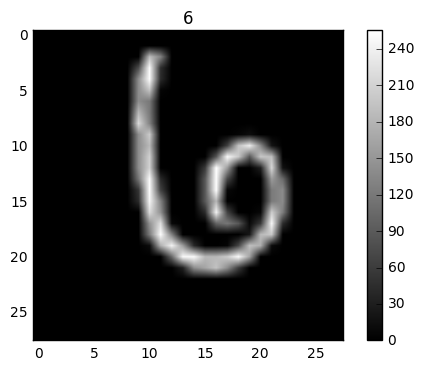

In [16]:
i=1
img=train_images.iloc[i].as_matrix()
img
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.colorbar()
plt.title(train_labels.iloc[i,0])

(array([ 682.,    9.,   10.,    7.,   10.,   18.,    7.,   17.,    7.,   17.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

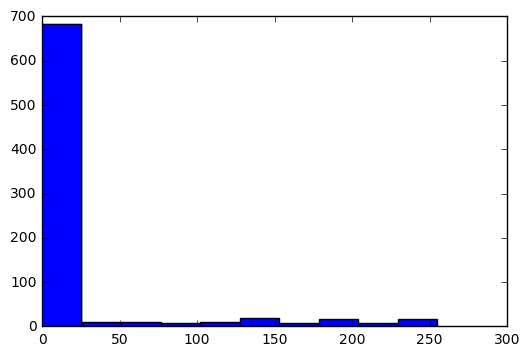

In [19]:
 plt.hist(train_images.iloc[i])

In [20]:
clf=svm.SVC()
clf.fit(train_images,train_labels.values.ravel())
clf.score(test_images,test_labels)

0.10000000000000001

In [21]:
test_images.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Program Files\Anaconda2\lib\site-packages\pandas\core\frame.py:2392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.where(-key, value, inplace=True)
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

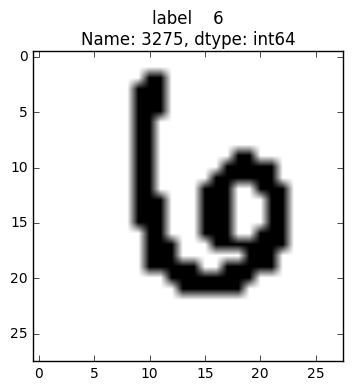

In [24]:
test_images[test_images >0]=1
train_images[train_images >0]=1
img=train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i])

(array([ 668.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  116.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

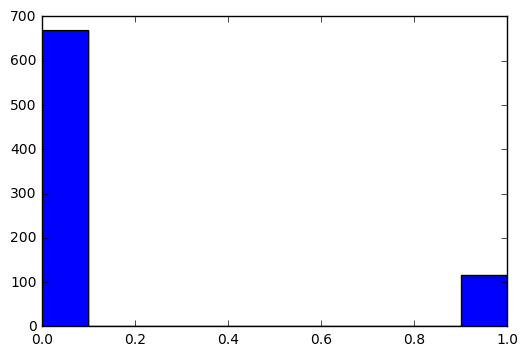

In [26]:
plt.hist(train_images.iloc[i])

In [27]:
clf=svm.SVC()
clf.fit(train_images,train_labels.values.ravel())
clf.score(test_images,test_labels)

0.88700000000000001

In [32]:
test=pd.read_csv('test.csv')
test[test > 0]=1
results=clf.predict(test)
results

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [33]:
test.shape

(28000, 784)

In [34]:
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv', header=True)

reference:

https://www.kaggle.com/archaeocharlie/digit-recognizer/a-beginner-s-approach-to-classification